In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('/content/advertising_data.csv')


In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
len(df)

200

In [ ]:

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print(df.head())
print(df.info())
print(len(df))


      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
200


In [ ]:
df.isna().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
data = df.values.tolist()

In [ ]:
X = [row[:-1] for row in data]
y = [row[-1] for row in data]

In [ ]:
def normalizeColumn(X, colIndex):
    colVals = [row[colIndex] for row in X]
    minVal = min(colVals)
    maxVal = max(colVals)
    for i in range(len(X)):
        X[i][colIndex] = (X[i][colIndex] - minVal) / (maxVal - minVal)

In [ ]:
for j in range(len(X[0])):
    normalizeColumn(X, j)

Add Bias

In [ ]:
for i in range(len(X)):
    X[i].insert(0, 1)

In [ ]:
m = len(y)
n = len(X[0])

In [ ]:
theta = [0] * n

In [ ]:
def predict(x, theta):
    return sum(x[i] * theta[i] for i in range(len(x)))

In [ ]:
def computeCost(X, y, theta):
    totalError = 0
    for i in range(m):
        totalError += (predict(X[i], theta) - y[i]) ** 2
    return totalError / (2 * m)

In [ ]:
def sgdMomentumWithLoss(X, y, theta, alpha, iterations, beta):
    velocity = [0] * len(theta)
    costHistory = []
    for _ in range(iterations):
        for i in range(len(y)):
            error = predict(X[i], theta) - y[i]
            for j in range(len(theta)):
                velocity[j] = beta * velocity[j] + alpha * error * X[i][j]
                theta[j] -= velocity[j]
        costHistory.append(computeCost(X, y, theta))
    return theta, costHistory

In [ ]:
def sgdRMSpropWithLoss(X, y, theta, alpha, iterations, beta, epsilon):
    squaredGradients = [0] * len(theta)
    costHistory = []
    for _ in range(iterations):
        for i in range(len(y)):
            error = predict(X[i], theta) - y[i]
            for j in range(len(theta)):
                gradient = error * X[i][j]
                squaredGradients[j] = beta * squaredGradients[j] + (1 - beta) * (gradient ** 2)
                theta[j] -= alpha * gradient / ((squaredGradients[j] ** 0.5) + epsilon)
        costHistory.append(computeCost(X, y, theta))
    return theta, costHistory

In [ ]:
alpha = 0.01
iterations = 10
betaMomentum = 0.9
betaRMSprop = 0.99
epsilon = 1e-8

In [ ]:
thetaMomentum, lossMomentum = sgdMomentumWithLoss(X, y, theta[:], alpha, iterations, betaMomentum)
thetaRMSprop, lossRMSprop = sgdRMSpropWithLoss(X, y, theta[:], alpha, iterations, betaRMSprop, epsilon)


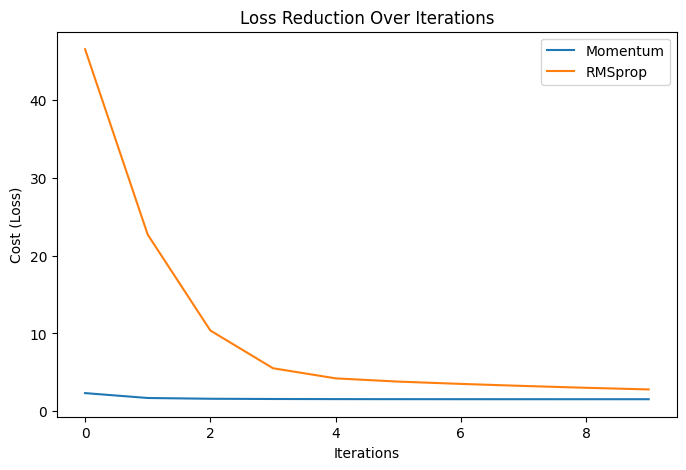

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(lossMomentum, label="Momentum")
plt.plot(lossRMSprop, label="RMSprop")
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Loss Reduction Over Iterations")
plt.legend()
plt.show()

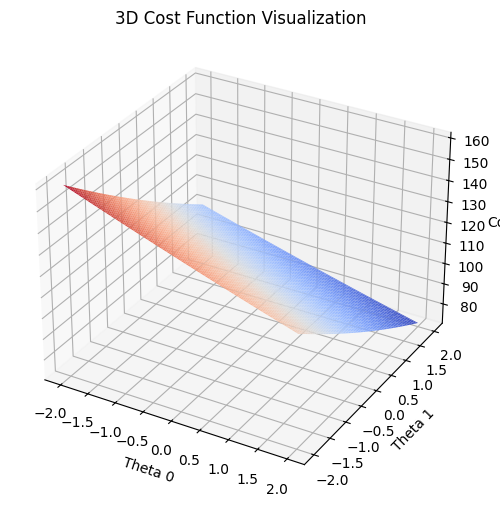

In [ ]:
theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 2, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        testTheta = [theta0_vals[i], theta1_vals[j], 0, 0]
        J_vals[i, j] = computeCost(X, y, testTheta)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='coolwarm')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('3D Cost Function Visualization')

plt.show()

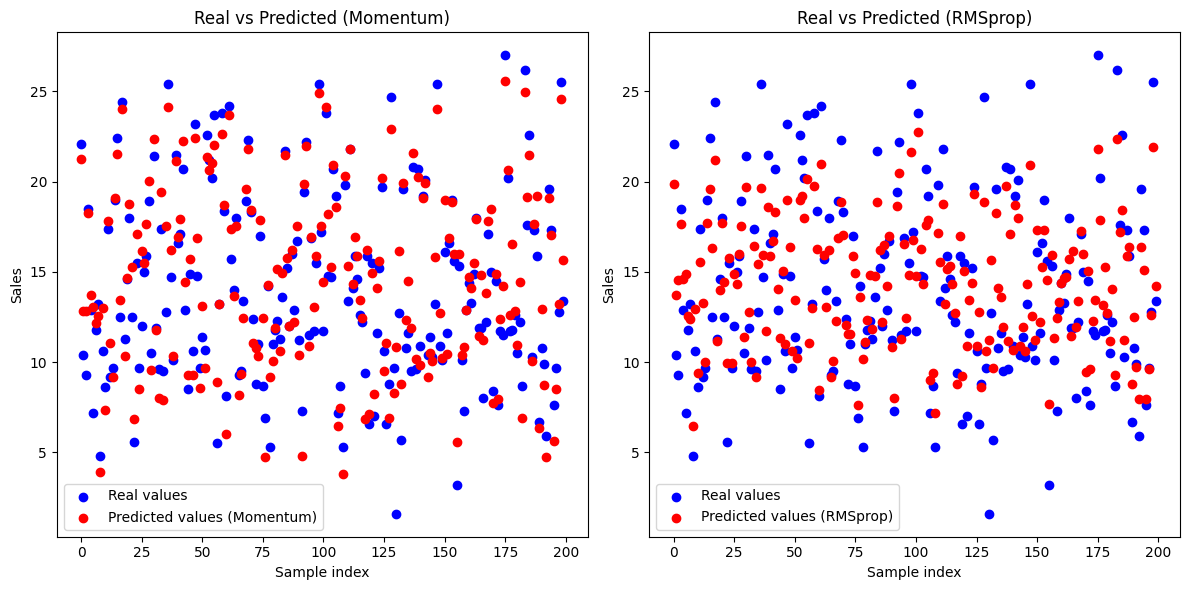

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def predict(x, theta):
    return sum(x[i] * theta[i] for i in range(len(x)))


def makePredictions(X, theta):
    predictions = []
    for i in range(len(X)):
        prediction = predict(X[i], theta)
        predictions.append(prediction)
    return predictions


predictionsMomentum = makePredictions(X, thetaMomentum)
predictionsRMSprop = makePredictions(X, thetaRMSprop)


plt.figure(figsize=(12,6))


plt.subplot(1, 2, 1)
plt.scatter(range(len(y)), y, color='blue', label='Real values')
plt.scatter(range(len(predictionsMomentum)), predictionsMomentum, color='red', label='Predicted values (Momentum)')
plt.xlabel('Sample index')
plt.ylabel('Sales')
plt.title('Real vs Predicted (Momentum)')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(range(len(y)), y, color='blue', label='Real values')
plt.scatter(range(len(predictionsRMSprop)), predictionsRMSprop, color='red', label='Predicted values (RMSprop)')
plt.xlabel('Sample index')
plt.ylabel('Sales')
plt.title('Real vs Predicted (RMSprop)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

In [ ]:
def initializeParameters(input_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, 4) * 0.01
    b1 = np.zeros((1, 4))
    W2 = np.random.randn(4, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [ ]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

In [ ]:
def forwardPropagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2
    return A1, A2

In [ ]:
def backPropagationMomentum(X, y, A1, A2, W1, b1, W2, b2, lr, mom, vW1, vb1, vW2, vb2):
    m = X.shape[0]
    dA2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dA2)
    db2 = (1 / m) * np.sum(dA2, axis=0, keepdims=True)
    dZ1 = np.dot(dA2, W2.T)
    dA1 = dZ1 * sigmoid_derivative(np.dot(X, W1) + b1)
    dW1 = (1 / m) * np.dot(X.T, dA1)
    db1 = (1 / m) * np.sum(dA1, axis=0, keepdims=True)
    vW1 = mom * vW1 + lr * dW1
    vb1 = mom * vb1 + lr * db1
    vW2 = mom * vW2 + lr * dW2
    vb2 = mom * vb2 + lr * db2
    W1 -= vW1
    b1 -= vb1
    W2 -= vW2
    b2 -= vb2
    return W1, b1, W2, b2, vW1, vb1, vW2, vb2

In [ ]:
def backPropagationRMSProp(X, y, A1, A2, W1, b1, W2, b2, lr, beta, eps, sW1, sb1, sW2, sb2):
    m = X.shape[0]
    dA2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dA2)
    db2 = (1 / m) * np.sum(dA2, axis=0, keepdims=True)
    dZ1 = np.dot(dA2, W2.T)
    dA1 = dZ1 * sigmoid_derivative(np.dot(X, W1) + b1)
    dW1 = (1 / m) * np.dot(X.T, dA1)
    db1 = (1 / m) * np.sum(dA1, axis=0, keepdims=True)
    sW1 = beta * sW1 + (1 - beta) * np.square(dW1)
    sb1 = beta * sb1 + (1 - beta) * np.square(db1)
    sW2 = beta * sW2 + (1 - beta) * np.square(dW2)
    sb2 = beta * sb2 + (1 - beta) * np.square(db2)
    W1 -= lr * dW1 / (np.sqrt(sW1) + eps)
    b1 -= lr * db1 / (np.sqrt(sb1) + eps)
    W2 -= lr * dW2 / (np.sqrt(sW2) + eps)
    b2 -= lr * db2 / (np.sqrt(sb2) + eps)
    return W1, b1, W2, b2, sW1, sb1, sW2, sb2

In [ ]:
def trainANN(X, y, input_size, output_size, epochs, lr, mom, beta, eps):
    W1, b1, W2, b2 = initializeParameters(input_size, output_size)
    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2 = np.zeros_like(b2)
    sW1 = np.zeros_like(W1)
    sb1 = np.zeros_like(b1)
    sW2 = np.zeros_like(W2)
    sb2 = np.zeros_like(b2)
    for _ in range(epochs):
        A1, A2 = forwardPropagation(X, W1, b1, W2, b2)
        W1, b1, W2, b2, vW1, vb1, vW2, vb2 = backPropagationMomentum(X, y, A1, A2, W1, b1, W2, b2, lr, mom, vW1, vb1, vW2, vb2)
        W1, b1, W2, b2, sW1, sb1, sW2, sb2 = backPropagationRMSProp(X, y, A1, A2, W1, b1, W2, b2, lr, beta, eps, sW1, sb1, sW2, sb2)
    return W1, b1, W2, b2

In [ ]:

df_features = df[['TV','radio','newspaper']]
df_target = df['sales']

In [ ]:
df_features = normalize(df_features)
X = df_features.values
X = np.c_[np.ones(X.shape[0]), X]
y = df_target.values.reshape(-1, 1)

In [ ]:
W1, b1, W2, b2 = trainANN(X, y, X.shape[1], 1, epochs=1000, lr=0.01, mom=0.9, beta=0.9, eps=1e-8)

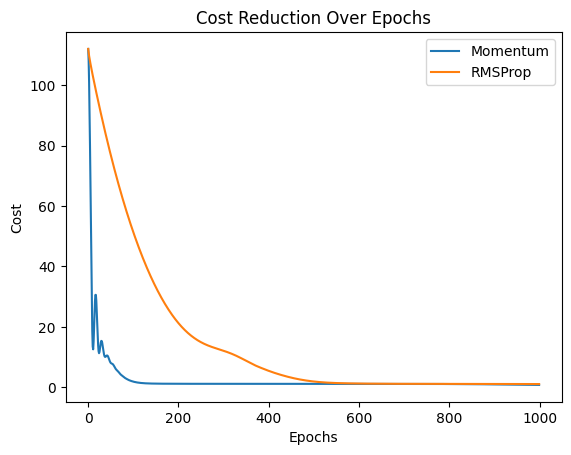

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

def initializeParameters(input_size, output_size):
    np.random.seed(42)=
    W1 = np.random.randn(input_size, 4) * 0.01
    b1 = np.zeros((1, 4))
    W2 = np.random.randn(4, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

def forwardPropagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2
    return A1, A2, Z1

def computeCost(X, y, W1, b1, W2, b2):
    m = X.shape[0]
    _, A2, _ = forwardPropagation(X, W1, b1, W2, b2)
    cost = np.sum((A2 - y) ** 2) / (2 * m)
    return cost

def backPropagationMomentum(X, y, A1, A2, Z1, W2, W1, b1, b2, lr, mom, vW1, vb1, vW2, vb2):
    m = X.shape[0]
    dA2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dA2)
    db2 = (1 / m) * np.sum(dA2, axis=0, keepdims=True)
    dZ1 = np.dot(dA2, W2.T) * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    vW1 = mom * vW1 + lr * dW1
    vb1 = mom * vb1 + lr * db1
    vW2 = mom * vW2 + lr * dW2
    vb2 = mom * vb2 + lr * db2
    W1 = W1 - vW1
    b1 = b1 - vb1
    W2 = W2 - vW2
    b2 = b2 - vb2
    return W1, b1, W2, b2, vW1, vb1, vW2, vb2

def backPropagationRMSProp(X, y, A1, A2, Z1, W2, W1, b1, b2, lr, beta, eps, sW1, sb1, sW2, sb2):
    m = X.shape[0]
    dA2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dA2)
    db2 = (1 / m) * np.sum(dA2, axis=0, keepdims=True)
    dZ1 = np.dot(dA2, W2.T) * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    sW1 = beta * sW1 + (1 - beta) * np.square(dW1)
    sb1 = beta * sb1 + (1 - beta) * np.square(db1)
    sW2 = beta * sW2 + (1 - beta) * np.square(dW2)
    sb2 = beta * sb2 + (1 - beta) * np.square(db2)
    W1 = W1 - lr * dW1 / (np.sqrt(sW1) + eps)
    b1 = b1 - lr * db1 / (np.sqrt(sb1) + eps)
    W2 = W2 - lr * dW2 / (np.sqrt(sW2) + eps)
    b2 = b2 - lr * db2 / (np.sqrt(sb2) + eps)
    return W1, b1, W2, b2, sW1, sb1, sW2, sb2

def trainANNMomentumWithLoss(X, y, input_size, output_size, epochs, lr, mom):
    W1, b1, W2, b2 = initializeParameters(input_size, output_size)
    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2 = np.zeros_like(b2)
    cost_history = []
    for i in range(epochs):
        A1, A2, Z1 = forwardPropagation(X, W1, b1, W2, b2)
        cost = computeCost(X, y, W1, b1, W2, b2)
        cost_history.append(cost)
        W1, b1, W2, b2, vW1, vb1, vW2, vb2 = backPropagationMomentum(X, y, A1, A2, Z1, W2, W1, b1, b2, lr, mom, vW1, vb1, vW2, vb2)
    return W1, b1, W2, b2, cost_history

def trainANNRMSPropWithLoss(X, y, input_size, output_size, epochs, lr, beta, eps):
    W1, b1, W2, b2 = initializeParameters(input_size, output_size)
    sW1 = np.zeros_like(W1)
    sb1 = np.zeros_like(b1)
    sW2 = np.zeros_like(W2)
    sb2 = np.zeros_like(b2)
    cost_history = []
    for i in range(epochs):
        A1, A2, Z1 = forwardPropagation(X, W1, b1, W2, b2)
        cost = computeCost(X, y, W1, b1, W2, b2)
        cost_history.append(cost)
        W1, b1, W2, b2, sW1, sb1, sW2, sb2 = backPropagationRMSProp(X, y, A1, A2, Z1, W2, W1, b1, b2, lr, beta, eps, sW1, sb1, sW2, sb2)
    return W1, b1, W2, b2, cost_history



W1_m, b1_m, W2_m, b2_m, cost_history_m = trainANNMomentumWithLoss(X, y, X.shape[1], 1, epochs=1000, lr=0.01, mom=0.9)
W1_r, b1_r, W2_r, b2_r, cost_history_r = trainANNRMSPropWithLoss(X, y, X.shape[1], 1, epochs=1000, lr=0.01, beta=0.9, eps=1e-8)

plt.plot(cost_history_m, label='Momentum')
plt.plot(cost_history_r, label='RMSProp')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Epochs")
plt.legend()
plt.show()


In [ ]:
W1_m, b1_m, W2_m, b2_m, cost_history_m = trainANNMomentumWithLoss(
    X, y, X.shape[1], 1, epochs=1000, lr=0.01, mom=0.9
)


W1_r, b1_r, W2_r, b2_r, cost_history_r = trainANNRMSPropWithLoss(
    X, y, X.shape[1], 1, epochs=1000, lr=0.01, beta=0.9, eps=1e-8
)

In [ ]:
num_points = 50
delta = 0.1


w2_0_m_center = W2_m[0, 0]
w2_1_m_center = W2_m[1, 0]
grid1_m = np.linspace(w2_0_m_center - delta, w2_0_m_center + delta, num_points)
grid2_m = np.linspace(w2_1_m_center - delta, w2_1_m_center + delta, num_points)
X_grid_m, Y_grid_m = np.meshgrid(grid1_m, grid2_m)
cost_surface_m = np.zeros_like(X_grid_m)

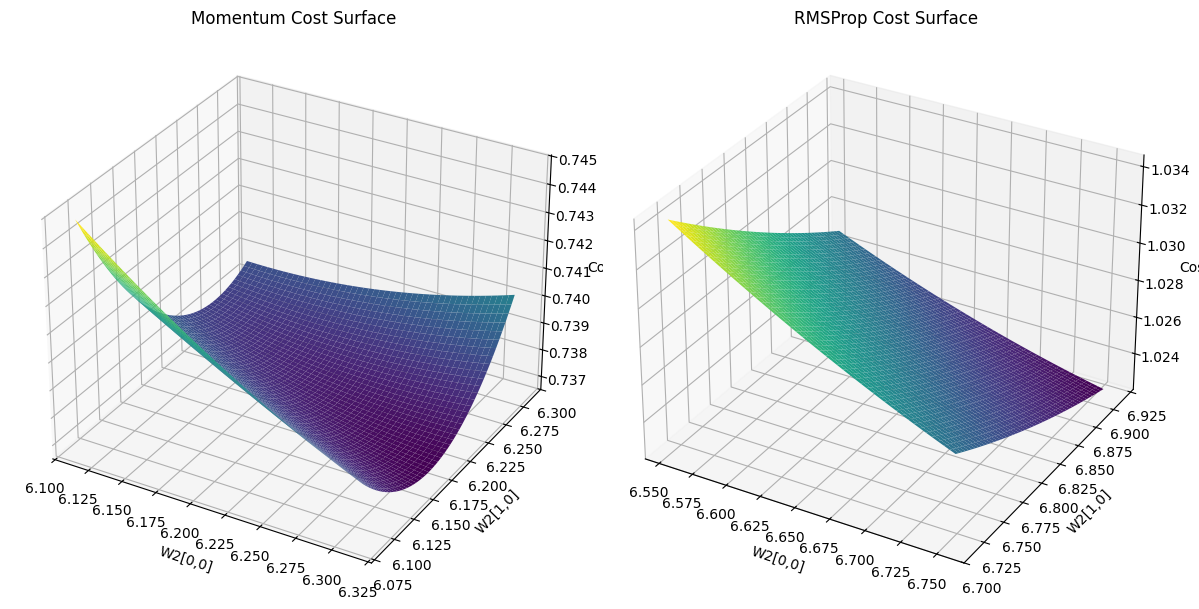

In [ ]:
w2_0_m_center = W2_m[0, 0]
w2_1_m_center = W2_m[1, 0]
grid1_m = np.linspace(w2_0_m_center - delta, w2_0_m_center + delta, num_points)
grid2_m = np.linspace(w2_1_m_center - delta, w2_1_m_center + delta, num_points)
X_grid_m, Y_grid_m = np.meshgrid(grid1_m, grid2_m)
cost_surface_m = np.zeros_like(X_grid_m)


for i in range(num_points):
    for j in range(num_points):
        W2_temp = W2_m.copy()
        W2_temp[0, 0] = X_grid_m[i, j]
        W2_temp[1, 0] = Y_grid_m[i, j]
        cost_surface_m[i, j] = computeCost(X, y, W1_m, b1_m, W2_temp, b2_m)


w2_0_r_center = W2_r[0, 0]
w2_1_r_center = W2_r[1, 0]
grid1_r = np.linspace(w2_0_r_center - delta, w2_0_r_center + delta, num_points)
grid2_r = np.linspace(w2_1_r_center - delta, w2_1_r_center + delta, num_points)
X_grid_r, Y_grid_r = np.meshgrid(grid1_r, grid2_r)
cost_surface_r = np.zeros_like(X_grid_r)

for i in range(num_points):
    for j in range(num_points):
        W2_temp = W2_r.copy()
        W2_temp[0, 0] = X_grid_r[i, j]
        W2_temp[1, 0] = Y_grid_r[i, j]
        cost_surface_r[i, j] = computeCost(X, y, W1_r, b1_r, W2_temp, b2_r)


fig = plt.figure(figsize=(12, 6))


ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_grid_m, Y_grid_m, cost_surface_m, cmap='viridis')
ax1.set_title("Momentum Cost Surface")
ax1.set_xlabel("W2[0,0]")
ax1.set_ylabel("W2[1,0]")
ax1.set_zlabel("Cost")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_grid_r, Y_grid_r, cost_surface_r, cmap='viridis')
ax2.set_title("RMSProp Cost Surface")
ax2.set_xlabel("W2[0,0]")
ax2.set_ylabel("W2[1,0]")
ax2.set_zlabel("Cost")

plt.tight_layout()
plt.show()